In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
from sklearn.datasets.base import Bunch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
from keras import utils as np_utils
from scipy import io
import numpy as np
import random
import imutils
import cv2
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam

In [56]:
facePath = "datasets\\peoples"
faces_size = (47, 62)
test_size = 0.25
epochs = 150

EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [57]:
def load_sunplusit_faces(datasetPath, face_size=faces_size, test_size=0.33, seed=42, flatten=False):
    imagePaths = sorted(list(paths.list_images(datasetPath)))

    # set the random seed, then initialize the data matrix and labels
    random.seed(seed)
    data = []
    labels = []

    # loop over the image paths
    for (i, imagePath) in enumerate(imagePaths):
        # load the image and convert it to grayscale
        print(imagePath)
        face = cv2.imread(imagePath)
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = cv2.resize(face, face_size)

        # check to see if the face should be flattened into a single row
        if flatten:
            face = face.flatten()

        # update the data matrix and associated labels
        data.append(face)

        labels.append(imagePath.split("\\")[-2])

    print(labels)
    np.savetxt('objects\\labels.out', labels, delimiter=',', fmt="%s") 
    # convert the data matrix and labels list to a NumPy array
    data = np.array(data)
    labels = np.array(labels)
    label_unique = len(np.unique(labels))
 
    le = LabelEncoder()
    hotlbl = le.fit_transform(labels)

    # split the data into training and testing segments
    (trainData, testData, trainLabels, testLabels) = train_test_split(data, hotlbl, test_size=test_size, random_state=42)

    # create the training and testing bunches
    #training = Bunch(name="training", data=trainData, target=trainLabels)
    #testing = Bunch(name="testing", data=testData, target=testLabels)

    # return a tuple of the training, testing bunches, and original labels
    return (trainData, testData, trainLabels, testLabels, label_unique) 

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

In [58]:
(training, testing, lbl_training, lbl_testing, num_unique_labels) = load_sunplusit_faces(facePath, test_size=test_size)


datasets\peoples\albert-tsai\face-117.jpg
datasets\peoples\albert-tsai\face-120.jpg
datasets\peoples\albert-tsai\face-203.jpg
datasets\peoples\albert-tsai\face-286.jpg
datasets\peoples\albert-tsai\face-359.jpg
datasets\peoples\albert-tsai\face-384.jpg
datasets\peoples\albert-tsai\face-41.jpg
datasets\peoples\albert-tsai\face-470.jpg
datasets\peoples\albert-tsai\face-77.jpg
datasets\peoples\amanda-liang\face-195.jpg
datasets\peoples\amanda-liang\face-237.jpg
datasets\peoples\amanda-liang\face-352.jpg
datasets\peoples\amanda-liang\face-364.jpg
datasets\peoples\amanda-liang\face-43.jpg
datasets\peoples\amanda-liang\face-488.jpg
datasets\peoples\ariel-lee\face-136.jpg
datasets\peoples\ariel-lee\face-155.jpg
datasets\peoples\ariel-lee\face-284.jpg
datasets\peoples\ariel-lee\face-36.jpg
datasets\peoples\ariel-lee\face-367.jpg
datasets\peoples\ariel-lee\face-374.jpg
datasets\peoples\ariel-lee\face-50.jpg
datasets\peoples\ariel-lee\face-54.jpg
datasets\peoples\ariel-lee\face-6.jpg
datasets\peo

datasets\peoples\joe-chuang\face-301.jpg
datasets\peoples\joe-chuang\face-305.jpg
datasets\peoples\joe-chuang\face-41.jpg
datasets\peoples\joe-chuang\face-421.jpg
datasets\peoples\joe-chuang\face-429.jpg
datasets\peoples\joe-chuang\face-537.jpg
datasets\peoples\joe-chuang\face-627.jpg
datasets\peoples\joe-chuang\face-69.jpg
datasets\peoples\joe-chuang\face-71.jpg
datasets\peoples\joe-sheu\face-0.jpg
datasets\peoples\joe-sheu\face-106.jpg
datasets\peoples\joe-sheu\face-129.jpg
datasets\peoples\joe-sheu\face-135.jpg
datasets\peoples\joe-sheu\face-164.jpg
datasets\peoples\joe-sheu\face-176.jpg
datasets\peoples\joe-sheu\face-199.jpg
datasets\peoples\joe-sheu\face-206.jpg
datasets\peoples\joe-sheu\face-227.jpg
datasets\peoples\joe-sheu\face-265.jpg
datasets\peoples\joe-sheu\face-272.jpg
datasets\peoples\joe-sheu\face-283.jpg
datasets\peoples\joe-sheu\face-284.jpg
datasets\peoples\joe-sheu\face-29.jpg
datasets\peoples\joe-sheu\face-3.jpg
datasets\peoples\joe-sheu\face-308.jpg
datasets\people

In [59]:
training = np.array(training)
testing = np.array(testing)
lbl_training = np.array(lbl_training)
lbl_testing = np.array(lbl_testing)

print("num_unique_labels={}".format(num_unique_labels))
print("trainData records: {}".format(len(training)))
print("testData records: {}".format(len(testing)))
print("trainData.shape={} trainLabels.shape={}".format(training.shape, lbl_training.shape))
print("testData.shape={} testLabels.shape={}".format(testing.shape, lbl_testing.shape))

num_unique_labels=28
trainData records: 334
testData records: 112
trainData.shape=(334, 62, 47, 3) trainLabels.shape=(334,)
testData.shape=(112, 62, 47, 3) testLabels.shape=(112,)


In [60]:
trainLabels_hot = np_utils.to_categorical(lbl_training)
testLabels_hot = np_utils.to_categorical(lbl_testing)
print(trainLabels_hot.shape)
print(testLabels_hot.shape)
print(trainLabels_hot[1])

(334, 28)
(112, 28)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [61]:
trainData_normalize = training.astype('float32') / 255.0
testData_normalize = testing.astype('float32') / 255.0
trainData_normalize[0][0][0]

array([0.5411765, 0.7647059, 0.9607843], dtype=float32)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(7, 7), padding='same', input_shape=(faces_size[1], faces_size[0], 3)))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024))
#model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(PReLU())
model.add(Dropout(rate=0.25))
model.add(Dense(num_unique_labels, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 47, 32)        4736      
_________________________________________________________________
p_re_lu_16 (PReLU)           (None, 62, 47, 32)        93248     
_________________________________________________________________
dropout_21 (Dropout)         (None, 62, 47, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 23, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 31, 23, 64)        51264     
_________________________________________________________________
p_re_lu_17 (PReLU)           (None, 31, 23, 64)        45632     
_________________________________________________________________
dropout_22 (Dropout)         (None, 31, 23, 64)        0         
__________

In [51]:
'''
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(trainData_normalize.shape)
print(trainLabels_hot.shape)
train_history=model.fit(x=trainData_normalize, y=trainLabels_hot, validation_data=(testData_normalize, testLabels_hot), validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)
'''

aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainData_normalize, trainLabels_hot, batch_size=BS),
    validation_data=(testData_normalize, testLabels_hot), steps_per_epoch=len(trainData_normalize) // BS,
    epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/25
10/10 [==============================] - 7s 678ms/step - loss: 0.1517 - acc: 0.9642 - val_loss: 0.1498 - val_acc: 0.9643
Epoch 2/25
10/10 [==============================] - 6s 570ms/step - loss: 0.1446 - acc: 0.9640 - val_loss: 0.1479 - val_acc: 0.9643
Epoch 3/25
10/10 [==============================] - 6s 594ms/step - loss: 0.1471 - acc: 0.9641 - val_loss: 0.1474 - val_acc: 0.9643
Epoch 4/25
10/10 [==============================] - 6s 583ms/step - loss: 0.1443 - acc: 0.9643 - val_loss: 0.1490 - val_acc: 0.9643
Epoch 5/25
10/10 [==============================] - 6s 592ms/step - loss: 0.1436 - acc: 0.9639 - val_loss: 0.1478 - val_acc: 0.9643
Epoch 6/25
10/10 [==============================] - 6s 572ms/step - loss: 0.1437 - acc: 0.9644 - val_loss: 0.1466 - val_acc: 0.9643
Epoch 7/25
10/10 [==============================] - 6s 581ms/step - loss: 0.1413 - acc: 0.9644 - val_loss: 0.1422 - val_acc: 0.9643
Epoch 8/25
10/10 [==============================]

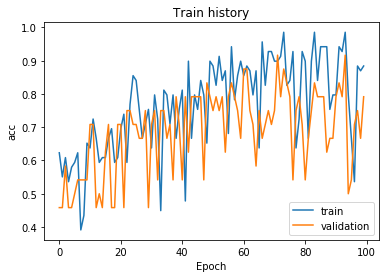

In [33]:
show_train_history(train_history, 'acc', 'val_acc')

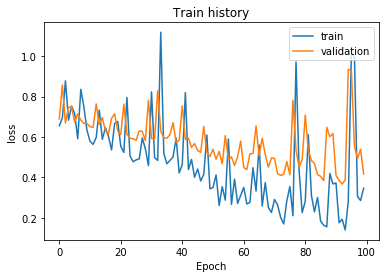

In [34]:
show_train_history(train_history, 'loss', 'val_loss')

In [35]:
import pandas as pd
prediction = model.predict_classes(testData_normalize)
pd.crosstab(lbl_testing, prediction, rownames=['label'], colnames=['predict'])

predict,0,1
label,,
0,11,2
1,3,8


In [36]:
from sklearn.metrics import classification_report
print(classification_report(lbl_testing, prediction))

             precision    recall  f1-score   support

          0       0.79      0.85      0.81        13
          1       0.80      0.73      0.76        11

avg / total       0.79      0.79      0.79        24



In [37]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [66]:
le = LabelEncoder()
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

labels = np.loadtxt('objects\\labels.out', delimiter=',', dtype=np.str)
le = LabelEncoder()
le.fit_transform(labels)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15

['ch-kung']


c:\users\chtseng\envs\boss\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


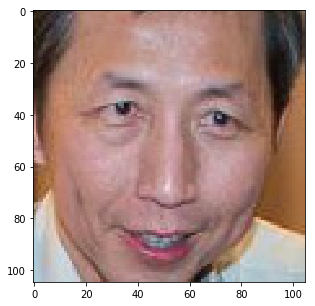

In [67]:
img = cv2.imread("face-129.jpg")
b,g ,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.figure(figsize=(8, 5))
plt.imshow(img)
img = np.array(cv2.resize(img, faces_size))
img_normalize = img.astype('float32') / 255.0
img_normalize = img_normalize[np.newaxis, ... ]
                 
predictionGave = loaded_model.predict_classes(img_normalize) 
print(le.inverse_transform(predictionGave))